<a href="https://colab.research.google.com/github/aisyatullatifah/Data_Mining/blob/main/Aisyatul_Latifah_4101422036_Tugas_Naive_Bayes_dan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pemanggildata
data = pd.read_csv("klasifikasimhs.csv")

In [3]:
data.head()

,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
0,0,PNS,10000000,3,1,0
1,0,TNI/POLRI,8000000,2,2,1
2,1,Petani,4000000,4,0,0
3,1,Nelayan,3000000,5,1,0
4,0,Buruh,2000000,2,1,1


Dataset yang diunggah berisi data klasifikasi UKT Mahasiswa yang berkaitan dengan kelayakan keringanan UKT bagi mahasiswa:
Penjelasan varibael dalam dataset:

Tempat tinggal: (0=memiliki tempat tinggal, 1=memiliki tempat tinggal)
pekerjaan orang tua: (profesi dari orangtua mahasiswa)
Penghasilan orang tua: (besaran nominal penghasilan yang diterima dari orangtua mahasiswa)
jumlah tanggungan orangtua: (jumlah tanggungan yang dimiliki)
kendaraan: (jumlah kendaraan yang dimiliki)
kelayakan keringanan UKT: (0=tidak layak mendapat keringanan UKT, 1=layak mendapat keringanan UKT)

Kegunaan dataset:
Dataset ini dapat digunakan untuk memprediksi mahasiswa yang layak mendapat keringanan UKT.



In [4]:
data.tail(5)

,Tempat Tinggal,Pekerjaan Orang Tua,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan,Kelayakan Keringanan UKT
95,0,PNS,9000000,2,2,1 1
96,1,Wiraswasta,6000000,1,1,1
97,1,TNI/POLRI,8000000,2,2,1
98,0,Nelayan,3000000,5,1,0
99,0,Petani,700000,3,1,0


In [5]:
#melihat statistik deskriptif
data.describe()

,Tempat Tinggal,Penghasilan Orang Tua,Jumlah Tanggungan Orang Tua,Kendaraan
count,100.000000,1.000000e+02,100.000000,100.000000
mean,0.500000,5.427000e+06,2.590000,1.070000
std,0.502519,2.533128e+06,1.129002,0.655282
min,0.000000,7.000000e+05,1.000000,0.000000
25%,0.000000,3.000000e+06,2.000000,1.000000
50%,0.500000,5.500000e+06,2.000000,1.000000
75%,1.000000,8.000000e+06,3.250000,1.250000
max,1.000000,1.000000e+07,5.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Tempat Tinggal               100 non-null    int64 
 1   Pekerjaan Orang Tua          100 non-null    object
 2   Penghasilan Orang Tua        100 non-null    int64 
 3   Jumlah Tanggungan Orang Tua  100 non-null    int64 
 4   Kendaraan                    100 non-null    int64 
 5   Kelayakan Keringanan UKT     100 non-null    object
dtypes: int64(4), object(2)
memory usage: 4.8+ KB


Berdasarkan output diatas dapat disimpulkan bahwa dataset tersebut, memiliki total: 6 kolom. Kolom pada dataset tersebut memiliki dua tipe data yaitu: integer dan object. dengan demikian tidak perlu diketahui encoding data. Jumlah maksimal baris untuk setiap kolom sebanyak: 100 baris. seluruh kolom sudah memiliki jumlah baris = 100, maka tidak perlu dilakukan penganganan mising value.

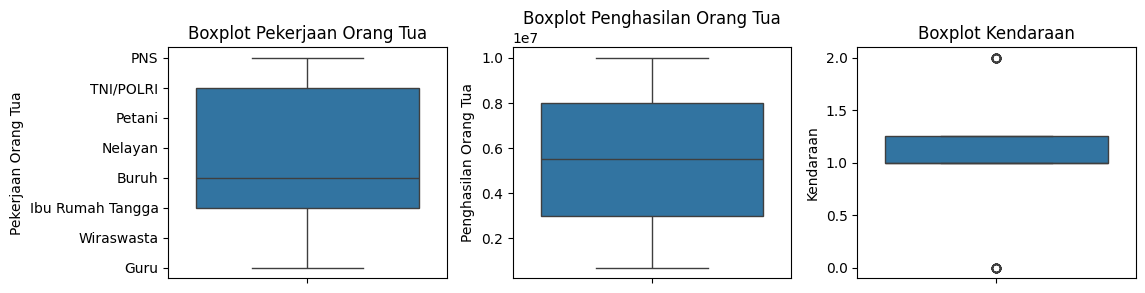

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#kolom numerik yang ingin dicek outliernya
num_cols = ['Pekerjaan Orang Tua', 'Penghasilan Orang Tua', 'Kendaraan']

#Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [11]:
def detect_outliers_iqr(data, column):
    # Check if the column contains numerical data
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)  # Kuartil 1
        Q3 = data[column].quantile(0.75)  # Kuartil 3
        IQR = Q3 - Q1  # Rentang interkuartil
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

K-NEAREST NEIGHBORS

Splitting dataset merupakan langkah penting dalam proses pembelajaran mesin, yaitu dengan membagi dataset menjadi dua bagian: data training dan data testing. Data training digunakan untuk melatih model, di mana model akan mempelajari pola dan hubungan antara fitur-fitur (variabel independen) dan label atau target (variabel dependen) dari dataset. Selama proses pelatihan ini, model akan menyesuaikan parameter-parameter internalnya berdasarkan pola yang ditemukan agar dapat melakukan prediksi yang akurat terhadap data yang belum pernah dilihat sebelumnya.

Sebaliknya, data testing digunakan untuk mengevaluasi kinerja model setelah proses pelatihan selesai. Data ini tidak dilibatkan dalam pelatihan, sehingga dapat digunakan untuk mengukur sejauh mana model mampu menggeneralisasi pengetahuan yang telah dipelajari dari data training. Evaluasi ini penting untuk memastikan bahwa model tidak hanya menghafal data latih (overfitting), tetapi juga dapat mengenali pola umum yang berlaku pada data baru.

In [12]:
from sklearn.model_selection import train_test_split

x = data.drop(columns=['Kelayakan Keringanan UKT'])
y = data['Kelayakan Keringanan UKT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
print(f'Total # of sample in whole dataset\t: {len(x)}')
print(f'Total # of sample in train dataset\t: {len(x_train)}')
print(f'Total # of sample in test dataset\t: {len(x_test)}')

Total # of sample in whole dataset	: 100
Total # of sample in train dataset	: 80
Total # of sample in test dataset	: 20


In [14]:
print(x_train)

    Tempat Tinggal Pekerjaan Orang Tua  Penghasilan Orang Tua  \
55               0                 PNS                9000000   
88               1          Wiraswasta                6000000   
26               0           TNI/POLRI                8000000   
42               0           TNI/POLRI                8000000   
69               0                Guru                7000000   
..             ...                 ...                    ...   
60               1               Buruh                2000000   
71               0                 PNS                9000000   
14               0    Ibu Rumah Tangga                3000000   
92               1               Buruh                2000000   
51               1           TNI/POLRI                8000000   

    Jumlah Tanggungan Orang Tua  Kendaraan  
55                            2          2  
88                            1          1  
26                            2          2  
42                            2        

In [15]:
print(y_train)

55    1
88    1
26    1
42    1
69    1
     ..
60    1
71    1
14    1
92    1
51    1
Name: Kelayakan Keringanan UKT, Length: 80, dtype: object


In [16]:
print(x_test)

    Tempat Tinggal Pekerjaan Orang Tua  Penghasilan Orang Tua  \
83               1           TNI/POLRI                8000000   
53               0                Guru                7000000   
70               1    Ibu Rumah Tangga                5000000   
45               0                Guru                7000000   
44               1               Buruh                2000000   
39               0                 PNS                9000000   
22               1    Ibu Rumah Tangga                5000000   
80               1          Wiraswasta                6000000   
10               0           TNI/POLRI                8000000   
0                0                 PNS               10000000   
18               0               Buruh                2000000   
30               0    Ibu Rumah Tangga                3000000   
73               0    Ibu Rumah Tangga                3000000   
33               0              Petani                4000000   
90               0       

In [17]:
print(y_test)

83    1
53    1
70    1
45    1
44    1
39    1
22    1
80    1
10    1
0     0
18    1
30    0
73    0
33    0
90    1
4     1
76    1
77    1
12    0
31    1
Name: Kelayakan Keringanan UKT, dtype: object


Feature Scaling
Tranformasi data dan Normalisasi data perlu dilakukan agar data dapat digunakan dalam algoritma KNN maupun naive Bayes

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Assuming data is your original DataFrame

# Separate features and target
x = data.drop(columns=['Kelayakan Keringanan UKT'])
y = data['Kelayakan Keringanan UKT']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Perform one-hot encoding for categorical features
categorical_features = ['Tempat Tinggal', 'Pekerjaan Orang Tua']  # Include both features
x_train = pd.get_dummies(x_train, columns=categorical_features, drop_first=True) #drop_first=True to avoid multicollinearity
x_test = pd.get_dummies(x_test, columns=categorical_features, drop_first=True) #drop_first=True to avoid multicollinearity

# Align columns (in case of different categories in train and test)
x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

# Now apply StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
print(x_train)

[[ 1.46593253 -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 0.64954128 -0.53761707 -0.0949158  -1.05131497  2.80871659 -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 1.87412815 -0.53761707  1.42373699  0.95118973 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 0.24134566 -1.38093797 -0.0949158   0.

In [24]:
print(x_test.dtype)

float64


Training the K-NN model on the Training set

In [25]:
from math import sqrt
class KNN():
  def __init__(self,k): #Changed _init_ to __init__
    self.k=k
    print(self.k)
  def fit(self,x_train,y_train):
    self.x_train=x_train
    self.y_train=y_train
  def calculate_euclidean(self,sample1,sample2):
    distance=0.0
    for i in range(len(sample1)):
      distance+=(sample1[i]-sample2[i])**2 #Euclidean Distance = sqrt(sum i to N (x1_i-x2_i)^2)
    return sqrt(distance)
  def nearest_neighbors(self,test_sample):
    distances=[] #calculate distances from a test sample to every sample in a training set
    for i in range(len(self.x_train)):
      distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
    distances.sort(key=lambda x:x[1]) #sort in ascending order, based on a distance value
    neighbors=[]
    for i in range(self.k): #get fist k samples
      neighbors.append(distances[i][0])
    return neighbors
  def predict(self,test_set):
    predictions=[]
    for test_sample in test_set:
      neigbors=self.nearest_neighbors(test_sample)
      labels=[sample for sample in neighbors]
      prediction=max(labels,key=labels.count)
      predictions.append(prediction)
    return predictions

In [26]:
model=KNN(k=5)
model.fit(x_train,y_train)

5


In [27]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
model = []
model.append(('KNN', KNeighborsClassifier()))

Prediksi dengan KNN berdasarkan model yang dibangun
Modelling dengan KNN

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#definisikan nilai K dan ba=uat objek KNN regressor
k = 3
knn = KNeighborsRegressor(n_neighbors=k)

#fitkan model KNN ke data train
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [41]:

# Penanganan nilai yang hilang (opsional)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Ganti dengan strategi yang sesuai
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [53]:
nb.fit(x_train, y_train)

GaussianNB()

In [54]:
nb.score(x_train, y_train)

0.7875

In [55]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(x_test)

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score # Import accuracy_score

nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_train, y_train)

classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(x_test)


for name in classif_name:
  print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name]))) # Now accuracy_score is defined

NB accuracy = 0.6000


In [58]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}
# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)


In [60]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 100
Total # of sample in train dataset: 80
Total # of sample in test dataset: 20


In [61]:
print(x_train)

[[ 1.46593253 -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 0.64954128 -0.53761707 -0.0949158  -1.05131497  2.80871659 -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 1.87412815 -0.53761707  1.42373699  0.95118973 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 0.24134566 -1.38093797 -0.0949158   0.

In [62]:
print(y_train)

55    1
88    1
26    1
42    1
69    1
     ..
60    1
71    1
14    1
92    1
51    1
Name: Kelayakan Keringanan UKT, Length: 80, dtype: object


In [63]:
print(x_test)

[[ 1.0577369  -0.53761707  1.42373699  0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 0.64954128 -0.53761707 -0.0949158  -1.05131497  2.80871659 -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [-0.16684996  0.30570382 -1.61356859  0.95118973 -0.3560345   2.17124059
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.64954128 -0.53761707 -0.0949158  -1.05131497  2.80871659 -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [-1.39143683 -0.53761707 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 1.46593253 -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [-0.16684996  0.30570382 -1.61356859  0.95118973 -0.3560345   2.17124059
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.

In [64]:
print(y_test)

83    1
53    1
70    1
45    1
44    1
39    1
22    1
80    1
10    1
0     0
18    1
30    0
73    0
33    0
90    1
4     1
76    1
77    1
12    0
31    1
Name: Kelayakan Keringanan UKT, dtype: object


In [65]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
print(x_train)

[[ 1.46593253 -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 1.0577369  -0.53761707  1.42373699 -1.05131497 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403  2.64575131 -0.3992747 ]
 [ 0.64954128 -0.53761707 -0.0949158  -1.05131497  2.80871659 -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447 -0.3992747 ]
 [ 1.87412815 -0.53761707  1.42373699  0.95118973 -0.3560345  -0.46056619
  -0.30966177  2.64575131 -0.42008403 -0.37796447 -0.3992747 ]
 [ 0.24134566 -1.38093797 -0.0949158   0.95118973 -0.3560345  -0.46056619
  -0.30966177 -0.37796447 -0.42008403 -0.37796447  2.50454133]
 [ 0.24134566 -1.38093797 -0.0949158   0.

In [67]:
print(x_test.dtype)

float64


In [68]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}
# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)


In [70]:
GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [72]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)



# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}
# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Fit the model to the data using grid_search.fit()
grid_search.fit(x_train, y_train) #This line is added

#Now that the model is fitted, you can access best_params_
print("Parameter terbaik:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochast

Parameter terbaik: {'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001, 'max_iter': 200}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [75]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

In [76]:
y_pred = clf.predict(x_test)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.87      0.87      0.87        15

    accuracy                           0.80        20
   macro avg       0.73      0.73      0.73        20
weighted avg       0.80      0.80      0.80        20



In [78]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.8